In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='./data', download=True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='./data', train=False)

In [5]:
len(test_dataset)

10000

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x2353853C888>, 5)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


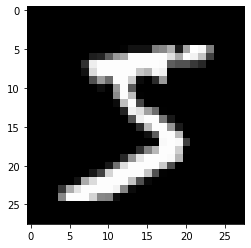

In [8]:
image, label = dataset[0]
plt.imshow(image, cmap = 'gray')
print("Label:", label)

Label: 0


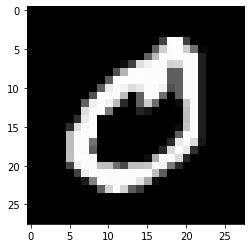

In [9]:
image, label = dataset[21]
plt.imshow(image, cmap = 'gray')
print("Label:", label)

In [10]:
import torchvision.transforms as transforms

In [11]:
dataset = MNIST(root='./data', train=True, transform=transforms.ToTensor())

In [12]:
img_tensor, label = dataset[0]
img_tensor.shape, label

(torch.Size([1, 28, 28]), 5)

In [13]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


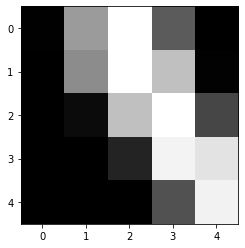

In [14]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

# Training and Validation

In [15]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [26]:
dir(train_ds)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'dataset',
 'indices']

In [28]:
# train_ds.indices
train_ds.dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [30]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle = True)
val_loader = DataLoader(val_ds, batch_size)

In [38]:
# dir(train_loader)
for xb, yb in train_loader:
    print('Batch Size: ',len(xb))
    print(xb)
    print('='*100)
    print(len(yb))
    print('Batch Size: ',yb)
    break

Batch Size:  128
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0.,

**We now see that `xb` has all the image tensor and `yb` has the required class**

Here, we get an output of `128 image tensors` with `128 classes or label` values

## Define a Model

In [40]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [45]:
print(model.weight.shape)
# print(model.weight)
print(model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


If we now try to give the model the input of tensor images then we would get an **error** like this.

In [46]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([3, 4, 8, 2, 0, 3, 6, 8, 7, 6, 2, 0, 5, 6, 9, 2, 0, 4, 1, 7, 0, 4, 6, 8,
        3, 5, 1, 6, 4, 0, 6, 9, 5, 1, 1, 5, 2, 4, 1, 2, 4, 0, 5, 9, 3, 4, 2, 3,
        0, 3, 1, 3, 5, 7, 7, 1, 9, 8, 5, 1, 7, 6, 6, 7, 4, 1, 1, 8, 0, 2, 8, 8,
        5, 8, 8, 1, 0, 5, 7, 6, 0, 8, 5, 5, 8, 6, 1, 8, 7, 0, 3, 4, 7, 1, 7, 9,
        8, 1, 9, 2, 7, 8, 4, 7, 2, 8, 3, 6, 7, 2, 3, 3, 9, 1, 1, 5, 9, 8, 7, 1,
        4, 4, 2, 7, 4, 6, 9, 6])
torch.Size([128, 1, 28, 28])


RuntimeError: size mismatch, m1: [3584 x 28], m2: [784 x 10] at C:\w\1\s\tmp_conda_3.7_055457\conda\conda-bld\pytorch_1565416617654\work\aten\src\TH/generic/THTensorMath.cpp:752

In [48]:
images.shape

torch.Size([128, 1, 28, 28])

we need to reshape the images as `[128, 784]`

In [51]:
images.reshape(128, input_size).shape

torch.Size([128, 784])

# Create a Model Class

In [52]:
class MNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, input_size)
        out = self.linear(xb)
        return out

In [53]:
model = MNISTModel()

In [55]:
# dir(model)

In [56]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [57]:
print(f'[INFO] Model Parameters:\n Weights Shape:\t {model.linear.weight.shape}\n Bias Shape: \t {model.linear.bias.shape}')

[INFO] Model Parameters:
 Weights Shape:	 torch.Size([10, 784])
 Bias Shape: 	 torch.Size([10])


In [58]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0112,  0.0134,  0.0136,  ..., -0.0298, -0.0138, -0.0121],
         [-0.0272, -0.0042,  0.0350,  ..., -0.0162,  0.0137,  0.0293],
         [ 0.0231,  0.0047, -0.0133,  ...,  0.0281,  0.0151,  0.0349],
         ...,
         [ 0.0357,  0.0187, -0.0186,  ...,  0.0004, -0.0226, -0.0311],
         [ 0.0296, -0.0174,  0.0205,  ..., -0.0111,  0.0002,  0.0080],
         [-0.0268, -0.0186, -0.0177,  ..., -0.0118,  0.0075, -0.0080]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0009,  0.0136,  0.0074,  0.0111, -0.0023, -0.0191,  0.0230,  0.0236,
          0.0304, -0.0219], requires_grad=True)]

In [60]:
for images, labels in train_loader:
    print(f'Batch Image Size: {images.shape}')
    outputs = model(images)
    break
print(f'outputs.shape:\t{outputs.shape}\nSample outputs:\t{outputs[:1].data}')

Batch Image Size: torch.Size([128, 1, 28, 28])
outputs.shape:	torch.Size([128, 10])
Sample outputs:	tensor([[ 0.1001,  0.0885,  0.2396, -0.0328, -0.0120, -0.1519,  0.0997, -0.0547,
          0.2307,  0.0314]])


In [61]:
import torch.nn.functional as F

In [62]:
outputs[:2]

tensor([[ 0.1001,  0.0885,  0.2396, -0.0328, -0.0120, -0.1519,  0.0997, -0.0547,
          0.2307,  0.0314],
        [-0.0311, -0.0373,  0.0942,  0.1708, -0.3437,  0.0628, -0.0751,  0.0255,
         -0.0419, -0.0274]], grad_fn=<SliceBackward>)

In [65]:
probs = F.softmax(outputs, dim=1)

print('Sample Probabilities: ', probs[:1].data)

print('Sum: ', torch.sum(probs[0]).item())

Sample Probabilities:  tensor([[0.1040, 0.1028, 0.1196, 0.0911, 0.0930, 0.0808, 0.1040, 0.0891, 0.1185,
         0.0971]])
Sum:  1.0


In [75]:
max_probs, preds = torch.max(probs, dim=1)
print(max_probs)
print(preds)

tensor([0.1196, 0.1201, 0.1168, 0.1374, 0.1162, 0.1193, 0.1292, 0.1122, 0.1268,
        0.1321, 0.1179, 0.1375, 0.1257, 0.1239, 0.1092, 0.1192, 0.1394, 0.1324,
        0.1156, 0.1309, 0.1154, 0.1302, 0.1199, 0.1198, 0.1179, 0.1238, 0.1232,
        0.1343, 0.1250, 0.1339, 0.1137, 0.1458, 0.1145, 0.1295, 0.1220, 0.1466,
        0.1490, 0.1277, 0.1249, 0.1214, 0.1243, 0.1135, 0.1514, 0.1312, 0.1385,
        0.1161, 0.1186, 0.1161, 0.1215, 0.1516, 0.1246, 0.1360, 0.1126, 0.1205,
        0.1216, 0.1278, 0.1320, 0.1280, 0.1212, 0.1160, 0.1209, 0.1202, 0.1224,
        0.1303, 0.1236, 0.1244, 0.1259, 0.1259, 0.1208, 0.1276, 0.1295, 0.1162,
        0.1260, 0.1116, 0.1237, 0.1204, 0.1273, 0.1348, 0.1278, 0.1219, 0.1203,
        0.1144, 0.1486, 0.1092, 0.1208, 0.1258, 0.1232, 0.1226, 0.1309, 0.1233,
        0.1183, 0.1216, 0.1184, 0.1176, 0.1496, 0.1172, 0.1251, 0.1132, 0.1220,
        0.1322, 0.1185, 0.1501, 0.1267, 0.1428, 0.1511, 0.1244, 0.1329, 0.1267,
        0.1184, 0.1092, 0.1413, 0.1305, 

`max_probs`: gives us the indices `preds`: gives us the predictions

In [72]:
labels

tensor([2, 9, 2, 7, 9, 9, 7, 9, 0, 6, 9, 5, 5, 4, 1, 2, 0, 7, 5, 3, 8, 2, 5, 5,
        5, 3, 3, 2, 7, 7, 7, 3, 4, 7, 7, 8, 4, 0, 2, 7, 8, 0, 0, 3, 7, 0, 8, 2,
        4, 8, 5, 0, 1, 6, 1, 3, 2, 6, 0, 2, 8, 7, 9, 6, 9, 9, 9, 2, 4, 5, 0, 3,
        4, 1, 6, 0, 0, 2, 8, 4, 0, 0, 2, 8, 1, 3, 8, 7, 4, 4, 9, 0, 2, 6, 8, 3,
        3, 9, 4, 3, 3, 5, 8, 0, 3, 9, 0, 3, 5, 6, 0, 9, 2, 0, 4, 2, 0, 0, 2, 4,
        2, 2, 3, 8, 0, 1, 8, 2])

# Evaluation Metric and Loss Function

In [76]:
outputs[:2]

tensor([[ 0.1001,  0.0885,  0.2396, -0.0328, -0.0120, -0.1519,  0.0997, -0.0547,
          0.2307,  0.0314],
        [-0.0311, -0.0373,  0.0942,  0.1708, -0.3437,  0.0628, -0.0751,  0.0255,
         -0.0419, -0.0274]], grad_fn=<SliceBackward>)

In [85]:
torch.sum(preds==labels).item() / len(preds)

0.1796875

This means that we got 23 right predictions

In [87]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [88]:
accuracy(outputs, labels)

tensor(0.1797)

In [89]:
probs

tensor([[0.1040, 0.1028, 0.1196,  ..., 0.0891, 0.1185, 0.0971],
        [0.0981, 0.0975, 0.1112,  ..., 0.1039, 0.0971, 0.0985],
        [0.1150, 0.0830, 0.0926,  ..., 0.0939, 0.0902, 0.1168],
        ...,
        [0.0949, 0.1155, 0.1195,  ..., 0.0935, 0.1042, 0.1085],
        [0.1205, 0.0994, 0.0874,  ..., 0.1123, 0.0935, 0.0984],
        [0.0888, 0.0947, 0.1152,  ..., 0.0879, 0.1255, 0.1049]],
       grad_fn=<SoftmaxBackward>)

we dont get better results when we use gradient descent instead for classification problems we can use some thing called `cross_entropy` which are idle for classification problems

In [91]:
outputs

tensor([[ 0.1001,  0.0885,  0.2396,  ..., -0.0547,  0.2307,  0.0314],
        [-0.0311, -0.0373,  0.0942,  ...,  0.0255, -0.0419, -0.0274],
        [ 0.1362, -0.1901, -0.0807,  ..., -0.0670, -0.1065,  0.1518],
        ...,
        [-0.0300,  0.1659,  0.2000,  ..., -0.0453,  0.0628,  0.1040],
        [ 0.2853,  0.0930, -0.0357,  ...,  0.2142,  0.0311,  0.0825],
        [ 0.0024,  0.0668,  0.2627,  ..., -0.0076,  0.3490,  0.1690]],
       grad_fn=<AddmmBackward>)

In [92]:
loss_fn = F.cross_entropy

In [93]:
loss = loss_fn(outputs, labels)
loss

tensor(2.2773, grad_fn=<NllLossBackward>)

# Training The Model

In [94]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    opt = opt_func(model.parameters(), lr)
    history = []
    
    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            opt.step()
            opt.zero_grad()
            
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [95]:
l1 = [1, 2, 3, 4, 5]

In [96]:
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [97]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

# ======================================

In [98]:
class MNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, input_size)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss':loss, 'val_acc':acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    opt = opt_func(model.parameters(), lr)
    history = []
    
    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            opt.step()
            opt.zero_grad()
            
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [100]:
model = MNISTModel()

In [101]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3346784114837646, 'val_acc': 0.0914754718542099}

In [102]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9631, val_acc: 0.6225
Epoch [1], val_loss: 1.6888, val_acc: 0.7342
Epoch [2], val_loss: 1.4845, val_acc: 0.7667
Epoch [3], val_loss: 1.3306, val_acc: 0.7838
Epoch [4], val_loss: 1.2127, val_acc: 0.7958


In [103]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1203, val_acc: 0.8050
Epoch [1], val_loss: 1.0463, val_acc: 0.8123
Epoch [2], val_loss: 0.9858, val_acc: 0.8204
Epoch [3], val_loss: 0.9356, val_acc: 0.8249
Epoch [4], val_loss: 0.8931, val_acc: 0.8286


In [104]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8569, val_acc: 0.8330
Epoch [1], val_loss: 0.8255, val_acc: 0.8360
Epoch [2], val_loss: 0.7980, val_acc: 0.8378
Epoch [3], val_loss: 0.7737, val_acc: 0.8403
Epoch [4], val_loss: 0.7521, val_acc: 0.8427


In [105]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7327, val_acc: 0.8449
Epoch [1], val_loss: 0.7153, val_acc: 0.8468
Epoch [2], val_loss: 0.6994, val_acc: 0.8487
Epoch [3], val_loss: 0.6850, val_acc: 0.8509
Epoch [4], val_loss: 0.6717, val_acc: 0.8524


Text(0.5, 1.0, 'Accuracy vs No. of epochs')

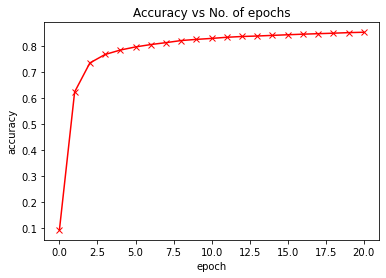

In [106]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-rx')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No. of epochs')

# Testing with individual images

In [107]:
test_dataset = MNIST(root = './data', train = False, transform = transforms.ToTensor())

Shape:  torch.Size([1, 28, 28])
Label:  7


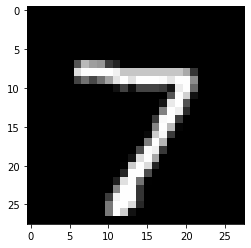

In [108]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape: ', img.shape)
print('Label: ', label)

In [111]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

`img.unsqueeze` simply adds another dimension at the begining of the 1x28x28 tensor, making it a 1x1x28x28 tensor, which the model views as a batch containing a single image.

Label: 7 Predicted: 7


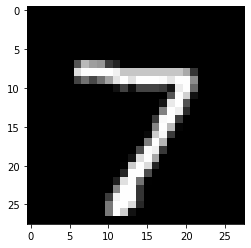

In [112]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted:', predict_image(img, model))

In [113]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6405271291732788, 'val_acc': 0.862597644329071}

# Saving and Loading the Model

In [115]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [119]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0022,  0.0090,  0.0020,  ..., -0.0058,  0.0165,  0.0241],
                      [-0.0185, -0.0187, -0.0226,  ...,  0.0077,  0.0301,  0.0031],
                      [-0.0265, -0.0161,  0.0212,  ...,  0.0342,  0.0213, -0.0121],
                      ...,
                      [ 0.0090,  0.0133,  0.0055,  ..., -0.0323, -0.0140,  0.0246],
                      [ 0.0350, -0.0081, -0.0297,  ..., -0.0006,  0.0329, -0.0316],
                      [ 0.0164,  0.0093, -0.0074,  ...,  0.0266,  0.0100,  0.0283]])),
             ('linear.bias',
              tensor([-0.0549,  0.1220, -0.0290, -0.0098,  0.0411,  0.0191, -0.0068,  0.0094,
                      -0.0659,  0.0023]))])

### Load

In [116]:
model2 = MNISTModel()

In [117]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))

<All keys matched successfully>

In [118]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0022,  0.0090,  0.0020,  ..., -0.0058,  0.0165,  0.0241],
                      [-0.0185, -0.0187, -0.0226,  ...,  0.0077,  0.0301,  0.0031],
                      [-0.0265, -0.0161,  0.0212,  ...,  0.0342,  0.0213, -0.0121],
                      ...,
                      [ 0.0090,  0.0133,  0.0055,  ..., -0.0323, -0.0140,  0.0246],
                      [ 0.0350, -0.0081, -0.0297,  ..., -0.0006,  0.0329, -0.0316],
                      [ 0.0164,  0.0093, -0.0074,  ...,  0.0266,  0.0100,  0.0283]])),
             ('linear.bias',
              tensor([-0.0549,  0.1220, -0.0290, -0.0098,  0.0411,  0.0191, -0.0068,  0.0094,
                      -0.0659,  0.0023]))])